In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

df = pd.read_csv('/Users/maximbortnik/Downloads/dataset_with_company_count_M.csv', sep=';', low_memory=False)

TARGET = 'salary.amount'
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = [c for c in X.columns if c not in numeric_feats]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_feats)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

n_features = X_train_proc.shape[1]
model = models.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1) 
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mean_absolute_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

es = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

y_pred = model.predict(X_test_proc).flatten()

mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Deep Learning Model Test MAE: {:.2f}")
print(f"Deep Learning Model Test R2:  {r2:.3f}")


Epoch 1/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 45196.2305 - rmse: 50213.4297 - val_loss: 13922.2246 - val_rmse: 17111.1973
Epoch 2/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 14631.8848 - rmse: 18032.5566 - val_loss: 12842.3545 - val_rmse: 15836.2002
Epoch 3/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13862.9951 - rmse: 17220.5547 - val_loss: 12653.4756 - val_rmse: 15649.5049
Epoch 4/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13748.6328 - rmse: 17074.9121 - val_loss: 12600.8994 - val_rmse: 15567.1982
Epoch 5/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13662.9609 - rmse: 16983.5781 - val_loss: 12572.0303 - val_rmse: 15552.5410
Epoch 6/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13742.6523 - rmse: 17069.7188 - val_loss: 12548.6543 - val_rmse: 15522.1865
Epoch 7/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13559.2295 - rmse: 16912.4375 - val_loss: 12550.0049 - val_rmse: 15545.1426
Epoch 8/100
1270/1270 ━━━━━

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

df = pd.read_csv('/Users/maximbortnik/Downloads/dataset_with_company_count_M.csv', sep=';', low_memory=False)

TARGET = 'salary.amount'
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = [c for c in X.columns if c not in numeric_feats]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

n_features = X_train_proc.shape[1]
model = models.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1) 
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mean_absolute_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

es = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

y_pred = model.predict(X_test_proc).flatten()

mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero = np.where(np.abs(y_true) < 1e-8, 1e-8, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / nonzero)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Deep Learning Model Test MAE:   {mae:.2f}")
print(f"Deep Learning Model Test R2:    {r2:.3f}")
print(f"Deep Learning Model Test MAPE:  {mape:.2f}%")


Epoch 1/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 45210.4023 - rmse: 50244.6602 - val_loss: 13965.2422 - val_rmse: 17165.2246
Epoch 2/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 14545.6221 - rmse: 17983.9297 - val_loss: 12836.2715 - val_rmse: 15801.0684
Epoch 3/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13825.2002 - rmse: 17147.6270 - val_loss: 12658.9424 - val_rmse: 15636.1982
Epoch 4/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13647.8730 - rmse: 16950.6758 - val_loss: 12601.7754 - val_rmse: 15564.3750
Epoch 5/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13643.6299 - rmse: 16970.7559 - val_loss: 12588.7979 - val_rmse: 15570.9746
Epoch 6/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13549.7646 - rmse: 16837.3496 - val_loss: 12569.0176 - val_rmse: 15546.0098
Epoch 7/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13492.8594 - rmse: 16793.4609 - val_loss: 12554.7510 - val_rmse: 15550.1670
Epoch 8/100
1270/1270 ━━━━━

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

df = pd.read_csv('/Users/maximbortnik/Downloads/dataset_with_company_count_M.csv', sep=';', low_memory=False)


TARGET = 'salary.amount'
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def smooth_target_encoding(X_tr, y_tr, X_te, col, alpha=10):
    """
    X_tr, y_tr — train; X_te — test
    col — имя категориального столбца
    alpha — параметр сглаживания
    """
    mu = y_tr.mean()
    stats = y_tr.groupby(X_tr[col]).agg(['mean','count']).rename(
        columns={'mean':'mean_target','count':'count'}
    )
    stats['smooth'] = (stats['count']*stats['mean_target'] + alpha*mu) / (stats['count'] + alpha)
    mapping = stats['smooth'].to_dict()
    X_tr[col + '_te'] = X_tr[col].map(mapping).fillna(mu)
    X_te[col + '_te'] = X_te[col].map(mapping).fillna(mu)
    return X_tr, X_te

for cat in ['area_orig', 'vacancy_type']:
    X_train, X_test = smooth_target_encoding(X_train, y_train, X_test, cat, alpha=10)

X_train = X_train.drop(columns=['area_orig','vacancy_type'])
X_test  = X_test.drop(columns=['area_orig','vacancy_type'])

numeric_feats = X_train.select_dtypes(include=[np.number]).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_feats)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

n_features = X_train_proc.shape[1]
model = models.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mean_absolute_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es, rlr],
    verbose=1
)

y_pred = model.predict(X_test_proc).flatten()
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denom = np.where(np.abs(y_true)<1e-8,1e-8,np.abs(y_true))
    return np.mean(np.abs((y_true-y_pred)/denom))*100

mape_val = mape(y_test, y_pred)

print(f"MAE:   {mae:.2f}")
print(f"R2:    {r2:.3f}")
print(f"MAPE:  {mape_val:.2f}%")


Epoch 1/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 57771.2031 - rmse: 60459.4336 - val_loss: 57083.6680 - val_rmse: 59720.2734 - learning_rate: 0.0010
Epoch 2/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 57545.3125 - rmse: 60246.1172 - val_loss: 56439.6719 - val_rmse: 59108.2852 - learning_rate: 0.0010
Epoch 3/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 56755.3164 - rmse: 59487.1367 - val_loss: 55494.9141 - val_rmse: 58208.8359 - learning_rate: 0.0010
Epoch 4/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 55848.1875 - rmse: 58604.6719 - val_loss: 54300.7461 - val_rmse: 57069.3203 - learning_rate: 0.0010
Epoch 5/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 54560.4023 - rmse: 57396.9961 - val_loss: 52868.0781 - val_rmse: 55710.0664 - learning_rate: 0.0010
Epoch 6/100
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 53054.9766 - rmse: 55956.0195 - val_loss: 51205.6016 - val_rmse: 54133.4922 - learning_rate: 0.0010
Epoch 7/100
1270/1270 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

df = pd.read_csv('/Users/maximbortnik/Downloads/dataset_with_company_count_M.csv', sep=';', low_memory=False)
df = df[(df['salary.amount'] >= 30000) & (df['salary.amount'] <= 80000)]
TARGET = 'salary.amount'
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = [c for c in X.columns if c not in numeric_feats]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

n_features = X_train_proc.shape[1]
model = models.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)  
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mean_absolute_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

es = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

y_pred = model.predict(X_test_proc).flatten()

mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero = np.where(np.abs(y_true) < 1e-8, 1e-8, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / nonzero)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Deep Learning Model Test MAE:   {mae:.2f}")
print(f"Deep Learning Model Test R2:    {r2:.3f}")
print(f"Deep Learning Model Test MAPE:  {mape:.2f}%")




Epoch 1/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 45757.2227 - rmse: 49899.5078 - val_loss: 12765.3047 - val_rmse: 15657.4834
Epoch 2/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13224.4336 - rmse: 16206.4287 - val_loss: 11524.9736 - val_rmse: 14070.2539
Epoch 3/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12413.6846 - rmse: 15269.2793 - val_loss: 11295.4004 - val_rmse: 13850.6436
Epoch 4/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12308.4766 - rmse: 15168.8418 - val_loss: 11230.4053 - val_rmse: 13776.3799
Epoch 5/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12190.2471 - rmse: 15073.0459 - val_loss: 11215.5615 - val_rmse: 13779.6631
Epoch 6/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12255.6084 - rmse: 15085.7539 - val_loss: 11183.9688 - val_rmse: 13723.2607
Epoch 7/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12167.1289 - rmse: 15049.4941 - val_loss: 11146.1855 - val_rmse: 13700.0439
Epoch 8/100
1134/1134 ━━━━━

355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
MAE:   11063.59
R2:    0.186
MAPE:  21.68%
ME:    -446.63


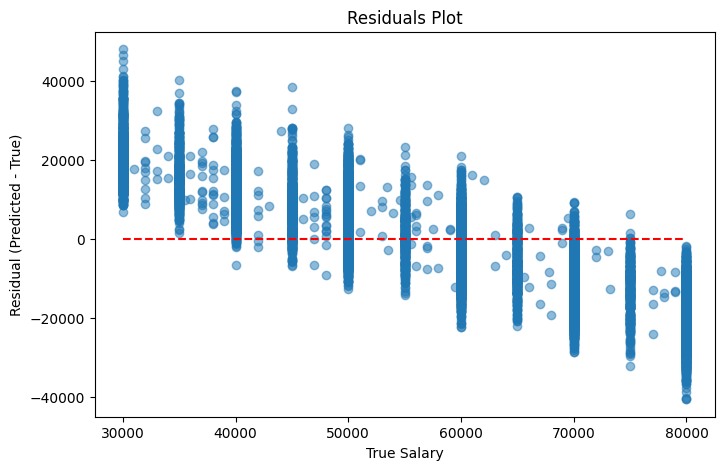

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/maximbortnik/Downloads/dataset_with_company_count_M.csv', sep=';', low_memory=False)
df = df[(df['salary.amount'] >= 30000) & (df['salary.amount'] <= 80000)]

TARGET = 'salary.amount'
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = [c for c in X.columns if c not in numeric_feats]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

n_features = X_train_proc.shape[1]
model = models.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mean_absolute_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_proc, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[es], verbose=0)

y_pred = model.predict(X_test_proc).flatten()
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
mean_error = np.mean(y_pred - y_test)  

def mean_absolute_percentage_error(y_true, y_pred):
    denom = np.where(np.abs(y_true) < 1e-8, 1e-8, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE:   {mae:.2f}")
print(f"R2:    {r2:.3f}")
print(f"MAPE:  {mape:.2f}%")
print(f"ME:    {mean_error:.2f}")

residuals = y_pred - y_test.values
plt.figure(figsize=(8,5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('True Salary')
plt.ylabel('Residual (Predicted - True)')
plt.title('Residuals Plot')
plt.show()


In [ ]:
pip install tensorflow pandas scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

df = pd.read_csv('/Users/maximbortnik/Downloads/dataset_with_company_count_M.csv', sep=';', low_memory=False)
df = df[(df['salary.amount'] >= 30000) & (df['salary.amount'] <= 80000)]

TARGET = 'salary.amount'
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)

sample_weights = y_train_log / np.mean(y_train_log)

numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = [c for c in X.columns if c not in numeric_feats]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_feats)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

n_features = X_train_proc.shape[1]
model = models.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1)  
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mean_absolute_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
history = model.fit(
    X_train_proc, y_train_log,
    sample_weight=sample_weights,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es, rlr],
    verbose=1
)

y_pred_log = model.predict(X_test_proc).flatten()
y_pred     = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    denom = np.where(np.abs(y_true) < 1e-8, 1e-8, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Log-transformed DL Model Test MAE:   {mae:.2f}")
print(f"Log-transformed DL Model Test R2:    {r2:.3f}")
print(f"Log-transformed DL Model Test MAPE:  {mape:.2f}%")


Epoch 1/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.7170 - rmse: 6.8932 - val_loss: 0.3291 - val_rmse: 0.3986 - learning_rate: 0.0010
Epoch 2/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9044 - rmse: 1.2992 - val_loss: 0.3267 - val_rmse: 0.3584 - learning_rate: 0.0010
Epoch 3/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7586 - rmse: 1.0261 - val_loss: 0.3252 - val_rmse: 0.3539 - learning_rate: 0.0010
Epoch 4/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6897 - rmse: 0.8972 - val_loss: 0.2707 - val_rmse: 0.2939 - learning_rate: 0.0010
Epoch 5/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6419 - rmse: 0.8066 - val_loss: 0.2548 - val_rmse: 0.2734 - learning_rate: 0.0010
Epoch 6/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5892 - rmse: 0.7227 - val_loss: 0.2362 - val_rmse: 0.2643 - learning_rate: 0.0010
Epoch 7/100
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5597 - rmse: 0.6811 - val_loss: 0.2444 - val_rmse: 0.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

df = pd.read_csv('/Users/maximbortnik/Downloads/dataset_with_company_count_M.csv', sep=';', low_memory=False)
df = df[(df['salary.amount'] >= 30000) & (df['salary.amount'] <= 90000)]

TARGET = 'salary.amount'
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)

sample_weights = y_train_log / np.mean(y_train_log)

numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = [c for c in X.columns if c not in numeric_feats]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_feats)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

n_features = X_train_proc.shape[1]
model = models.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1) 
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mean_absolute_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
history = model.fit(
    X_train_proc, y_train_log,
    sample_weight=sample_weights,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es, rlr],
    verbose=1
)

y_pred_log = model.predict(X_test_proc).flatten()
y_pred     = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    denom = np.where(np.abs(y_true) < 1e-8, 1e-8, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Log-transformed DL Model Test MAE:   {mae:.2f}")
print(f"Log-transformed DL Model Test R2:    {r2:.3f}")
print(f"Log-transformed DL Model Test MAPE:  {mape:.2f}%")


Epoch 1/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.5281 - rmse: 6.7118 - val_loss: 0.3405 - val_rmse: 0.3738 - learning_rate: 0.0010
Epoch 2/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9101 - rmse: 1.2219 - val_loss: 0.3491 - val_rmse: 0.3716 - learning_rate: 0.0010
Epoch 3/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7516 - rmse: 0.9829 - val_loss: 0.2743 - val_rmse: 0.2919 - learning_rate: 0.0010
Epoch 4/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6722 - rmse: 0.8517 - val_loss: 0.2595 - val_rmse: 0.2784 - learning_rate: 0.0010
Epoch 5/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6182 - rmse: 0.7596 - val_loss: 0.2699 - val_rmse: 0.2909 - learning_rate: 0.0010
Epoch 6/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5798 - rmse: 0.7009 - val_loss: 0.2499 - val_rmse: 0.2766 - learning_rate: 0.0010
Epoch 7/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5411 - rmse: 0.6567 - val_loss: 0.2664 - val_rmse: 0.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import uniform, randint

df = pd.read_csv('/Users/maximbortnik/Downloads/dataset_with_company_count_M.csv', sep=';', low_memory=False)
df = df[(df['salary.amount'] >= 30000) & (df['salary.amount'] <= 90000)]
X = df.drop('salary.amount', axis=1)
y = df['salary.amount'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train_numeric = X_train.select_dtypes(include=[np.number])

corr = pd.concat([X_train_numeric, y_train.rename('salary')], axis=1).corr()['salary'].abs().sort_values(ascending=False)

thresholds = [0.06, 0.08, 0.1, 0.15, 0.18, 0.20, 0.22, 0.25]
results = []

cat_feat = 'vacancy_type'

for thr in thresholds:
    selected_feats = corr[corr.index != 'salary'][corr >= thr].index.tolist()
    print(f"\n=== Threshold {thr:.2f}: {len(selected_feats)} features ===")
    
    if cat_feat not in selected_feats:
        selected_feats.append(cat_feat)

    num_feats = [c for c in selected_feats if c != cat_feat and np.issubdtype(X_train[c].dtype, np.number)]
    cat_feats = [cat_feat] if cat_feat in selected_feats else []

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_feats)
    ])

    model = HistGradientBoostingRegressor(random_state=42)
    pipe = Pipeline([
        ('pre', preprocessor),
        ('mdl', model)
    ])

    param_dist = {
        'mdl__max_iter': randint(100, 300),
        'mdl__learning_rate': uniform(0.01, 0.2),
        'mdl__max_depth': randint(3, 10)
    }

    rs = RandomizedSearchCV(
        pipe, param_dist,
        n_iter=20, scoring='neg_mean_absolute_error',
        cv=3, n_jobs=-1, random_state=42
    )
    rs.fit(X_train[selected_feats], y_train)

    best_model = rs.best_estimator_
    preds = best_model.predict(X_test[selected_feats])
    mae = mean_absolute_error(y_test, preds)
    results.append({
        'threshold': thr,
        'n_features': len(selected_feats),
        'best_params': rs.best_params_,
        'test_mae': mae
    })
    print(f" MAE = {mae:.2f}")
    print(f" R2 = {r2:.2f}")

print("\n📊 Результаты:")
print(pd.DataFrame(results))


=== Threshold 0.06: 23 features ===
 MAE = 12331.66
 R2 = 0.14

=== Threshold 0.08: 20 features ===
 MAE = 12354.02
 R2 = 0.14

=== Threshold 0.10: 20 features ===
 MAE = 12354.02
 R2 = 0.14

=== Threshold 0.15: 15 features ===
 MAE = 12545.67
 R2 = 0.14

=== Threshold 0.18: 12 features ===
 MAE = 12588.01
 R2 = 0.14

=== Threshold 0.20: 8 features ===
 MAE = 13121.84
 R2 = 0.14

=== Threshold 0.22: 7 features ===
 MAE = 13116.84
 R2 = 0.14

=== Threshold 0.25: 0 features ===
 MAE = 13815.66
 R2 = 0.14

📊 Результаты:
   threshold  n_features                                        best_params  \
0       0.06          24  {'mdl__learning_rate': 0.10335257864959599, 'm...   
1       0.08          21  {'mdl__learning_rate': 0.11495493205167782, 'm...   
2       0.10          21  {'mdl__learning_rate': 0.11495493205167782, 'm...   
3       0.15          16  {'mdl__learning_rate': 0.10335257864959599, 'm...   
4       0.18          13  {'mdl__learning_rate': 0.13199933155652419, 'm...   
5 

In [31]:
df.head()

,vacancy_type,area_orig,age,gender.id,education.level.id,salary.amount,total_experience.months,month,year,inflation_rate,...,natural_prirost_rozhd,mortality,median_salary,percent_with_internet,migration_prirost,number_top_school,prirost_naselenia,percent_poor,rate_of_quality_life,exp_company_count
1,Инсталлятор,Абинск,32.0,male,2.0,30000.0,47.0,1,2025,9.92,...,-0.5,12.5,33903.0,68.3,62.54,0.000000,10.31,11.6,76.130,2
2,Менеджер по поддержке продаж,Абинск,41.0,female,5.0,70000.0,199.0,1,2025,9.92,...,-0.5,12.5,33903.0,68.3,62.54,0.000000,10.31,11.6,76.130,6
3,Инсталлятор,Азов,50.0,male,2.0,80000.0,355.0,1,2025,9.92,...,-3.1,13.4,32241.0,68.5,4.51,0.418252,-1.10,13.9,68.296,1
4,Инсталлятор,Азов,24.0,male,2.0,70000.0,55.0,12,2024,9.51,...,-3.1,13.4,32241.0,68.5,4.51,0.418252,-1.10,13.9,68.296,2
5,Инсталлятор,Аксай (Ростовская область),39.0,male,4.0,80000.0,171.0,1,2025,9.92,...,-3.1,13.4,32241.0,68.5,4.51,0.418252,-1.10,13.9,68.296,5
